# 地目

地理院メッシュの各点がどの流域に

[国土数値情報 土地利用細分メッシュデータ](https://nlftp.mlit.go.jp/ksj/gml/datalist/KsjTmplt-L03-b.html)



In [42]:
import geopandas as gpd

land="L03-b-16_5338-tky_GML/L03-b-16_5338-tky.shp"
land = gpd.read_file(land, encoding="cp932")
land2="L03-b-16_5339-tky_GML/L03-b-16_5339-tky.shp"
land2 = gpd.read_file(land2, encoding="cp932")
land = pd.concat([land, land2])
land

,メッシュ,土地利用種,撮影年月日,geometry
0,5338000000,0500,20160522,"POLYGON ((138.00000 35.33333, 138.00000 35.334..."
1,5338000001,0500,20160522,"POLYGON ((138.00125 35.33333, 138.00125 35.334..."
2,5338000002,0500,20160522,"POLYGON ((138.00250 35.33333, 138.00250 35.334..."
3,5338000003,0500,20160522,"POLYGON ((138.00375 35.33333, 138.00375 35.334..."
4,5338000004,0500,20160522,"POLYGON ((138.00500 35.33333, 138.00500 35.334..."
...,...,...,...,...
629995,5339779995,0700,20160519,"POLYGON ((139.99375 35.99917, 139.99375 36.000..."
629996,5339779996,0200,20160519,"POLYGON ((139.99500 35.99917, 139.99500 36.000..."
629997,5339779997,1100,20160519,"POLYGON ((139.99625 35.99917, 139.99625 36.000..."
629998,5339779998,0100,20160519,"POLYGON ((139.99750 35.99917, 139.99750 36.000..."


これは細かすぎる。全部で100万点以上ある。

土地利用の種類も読みとる。

In [6]:
import pandas as pd

landtypes = pd.read_html("https://nlftp.mlit.go.jp/ksj/gml/codelist/LandUseCd-09.html")
landtypes

[       0        1                                                  2
 0    コード       種別                                                 定義
 1   0100        田                                 湿田・乾田・沼田・蓮田及び田とする。
 2   0200  その他の農用地  麦・陸稲・野菜・草地・芝地・りんご・梨・桃・ブドウ・茶・桐・はぜ・こうぞ・しゅろ等を栽培する...
 3   0300        -                                                  -
 4   0400        -                                                  -
 5   0500       森林                                 多年生植物の密生している地域とする。
 6   0600       荒地      しの地・荒地・がけ・岩・万年雪・湿地・採鉱地等で旧土地利用データが荒地であるところとする。
 7   0700     建物用地                          住宅地・市街地等で建物が密集しているところとする。
 8   0800        -                                                  -
 9   0901       道路                               道路などで、面的に捉えられるものとする。
 10  0902       鉄道                          鉄道・操車場などで、面的にとらえられるものとする。
 11  1000   その他の用地             運動競技場、空港、競馬場・野球場・学校・港湾地区・人工造成地の空地等とする。
 12  1100  河川地及び湖沼   人工湖・自然湖・池・養魚場等で平水時に常に水を湛えているところ及び河川・河川区域の河川敷とする。
 13  1200        -  

メッシュの12桁の数字の読み方がわからない。→geometry情報があるじゃないか!

100万点をひとつずつ領域内かどうか確認するのは無駄に重い。一方、画像と思えば、100万画素などたいした大きさではない。

メッシュ1つが1ピクセルになるような画像で考えるのがよろしい。

In [14]:
print(land.loc[0, "geometry"])

POLYGON ((138 35.333333333333336, 138 35.33416666666667, 138.00125 35.33416666666667, 138.00125 35.333333333333336, 138 35.333333333333336))


経度の単位は0.00125=1/800、緯度の単位は0.0008333333333=1/1200

なので、polygonのセントロイドを800倍、1200倍して整数化し、これを用いる。

原点は(138,35)とする。

In [24]:
xmin = min(land.loc[:, "geometry"].centroid.x)
ymin = min(land.loc[:, "geometry"].centroid.y)
xmax = max(land.loc[:, "geometry"].centroid.x)
ymax = max(land.loc[:, "geometry"].centroid.y)
xmin, xmax, ymin, ymax

/var/folders/g2/t_qwkbf48xj4860059bm17mh0000gs/T/ipykernel_28869/3095114485.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  xmin = min(land.loc[:, "geometry"].centroid.x)
/var/folders/g2/t_qwkbf48xj4860059bm17mh0000gs/T/ipykernel_28869/3095114485.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ymin = min(land.loc[:, "geometry"].centroid.y)
/var/folders/g2/t_qwkbf48xj4860059bm17mh0000gs/T/ipykernel_28869/3095114485.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  xmax = max(land.loc[:, "geometry"].centroid.x)
/var/folders/g2/t_qwkbf48xj4860059bm17mh0000gs/T/ipy

(138.00062500000004, 138.999375, 35.333749999999995, 35.999583333333334)

In [43]:
import numpy as np


landtypes = {
    "0100": "田",  #                                 湿田・乾田・沼田・蓮田及び田とする。
    "0200": "畑",  #  その他の農用地  麦・陸稲・野菜・草地・芝地・りんご・梨・桃・ブドウ・茶・桐・はぜ・こうぞ・しゅろ等を栽培する...
    "0500": "森",  # 林                                 多年生植物の密生している地域とする。
    "0600": "荒",  #      しの地・荒地・がけ・岩・万年雪・湿地・採鉱地等で旧土地利用データが荒地であるところとする。
    "0700": "建",  # 物用地                          住宅地・市街地等で建物が密集しているところとする。
    "0901": "道",  #                              道路などで、面的に捉えられるものとする。
    "0902": "鉄",  # 道                          鉄道・操車場などで、面的にとらえられるものとする。
    "1000": "他",  # の用地             運動競技場、空港、競馬場・野球場・学校・港湾地区・人工造成地の空地等とする。
    "1100": "水",  #  河川地及び湖沼   人工湖・自然湖・池・養魚場等で平水時に常に水を湛えているところ及び河川・河川区域の河川敷とする。
    "1400": "浜",  #                                海岸に接する砂、れき、岩の区域とする。
    "1500": "海",  # 水域                                隠顕岩、干潟、シーパースも海に含める。
    "1600": "ゴ",  # ルフ場
}

map = np.empty([1200, 2400], dtype=str)

for _, r in land.iterrows():
    center = r["geometry"].centroid
    ix = int((center.x - 138) * 800)
    iy = int((center.y - 35) * 1200)
    assert ix >= 0 and iy >= 0, (center, ix,iy)
    map[iy,ix] = landtypes[r["土地利用種"]]
    

In [44]:
map

array([['', '', '', ..., '', '', ''],
       ['', '', '', ..., '', '', ''],
       ['', '', '', ..., '', '', ''],
       ...,
       ['森', '森', '森', ..., '', '', ''],
       ['森', '森', '森', ..., '', '', ''],
       ['森', '森', '森', ..., '', '', '']], dtype='<U1')

In [155]:
from matplotlib.colors import to_rgba

colormapping = {
    "田": to_rgba("lightgreen"),  #                                 湿田・乾田・沼田・蓮田及び田とする。
    "畑": to_rgba("yellow"), #  その他の農用地  麦・陸稲・野菜・草地・芝地・りんご・梨・桃・ブドウ・茶・桐・はぜ・こうぞ・しゅろ等を栽培する...
    "森": to_rgba("#060"), # 林                                 多年生植物の密生している地域とする。
    "荒": to_rgba("gray"), #      しの地・荒地・がけ・岩・万年雪・湿地・採鉱地等で旧土地利用データが荒地であるところとする。
    "建": to_rgba("#f40"), # 物用地                          住宅地・市街地等で建物が密集しているところとする。
    "道": to_rgba("darkgray"), #                              道路などで、面的に捉えられるものとする。
    "鉄": to_rgba("brown"), # 道                          鉄道・操車場などで、面的にとらえられるものとする。
    "他": to_rgba("white"), # の用地             運動競技場、空港、競馬場・野球場・学校・港湾地区・人工造成地の空地等とする。
    "水": to_rgba("lightblue"), #  河川地及び湖沼   人工湖・自然湖・池・養魚場等で平水時に常に水を湛えているところ及び河川・河川区域の河川敷とする。
    "浜": to_rgba("beige"), #                                海岸に接する砂、れき、岩の区域とする。
    "海": to_rgba("darkblue"), # 水域                                隠顕岩、干潟、シーパースも海に含める。
    "ゴ": to_rgba("lime"), # ルフ場
}

colormapping

{'田': (0.5647058823529412, 0.9333333333333333, 0.5647058823529412, 1.0),
 '畑': (1.0, 1.0, 0.0, 1.0),
 '森': (0.0, 0.4, 0.0, 1.0),
 '荒': (0.5019607843137255, 0.5019607843137255, 0.5019607843137255, 1.0),
 '建': (1.0, 0.26666666666666666, 0.0, 1.0),
 '道': (0.6627450980392157, 0.6627450980392157, 0.6627450980392157, 1.0),
 '鉄': (0.6470588235294118, 0.16470588235294117, 0.16470588235294117, 1.0),
 '他': (1.0, 1.0, 1.0, 1.0),
 '水': (0.6784313725490196, 0.8470588235294118, 0.9019607843137255, 1.0),
 '浜': (0.9607843137254902, 0.9607843137254902, 0.8627450980392157, 1.0),
 '海': (0.0, 0.0, 0.5450980392156862, 1.0),
 'ゴ': (0.0, 1.0, 0.0, 1.0)}

In [156]:
R = np.zeros([1200, 2400], dtype=int)
G = np.zeros([1200, 2400], dtype=int)
B = np.zeros([1200, 2400], dtype=int)

for landtype, (r,g,b,a) in colormapping.items():
    R[map == landtype] = r*255
    G[map == landtype] = g*255
    B[map == landtype] = b*255



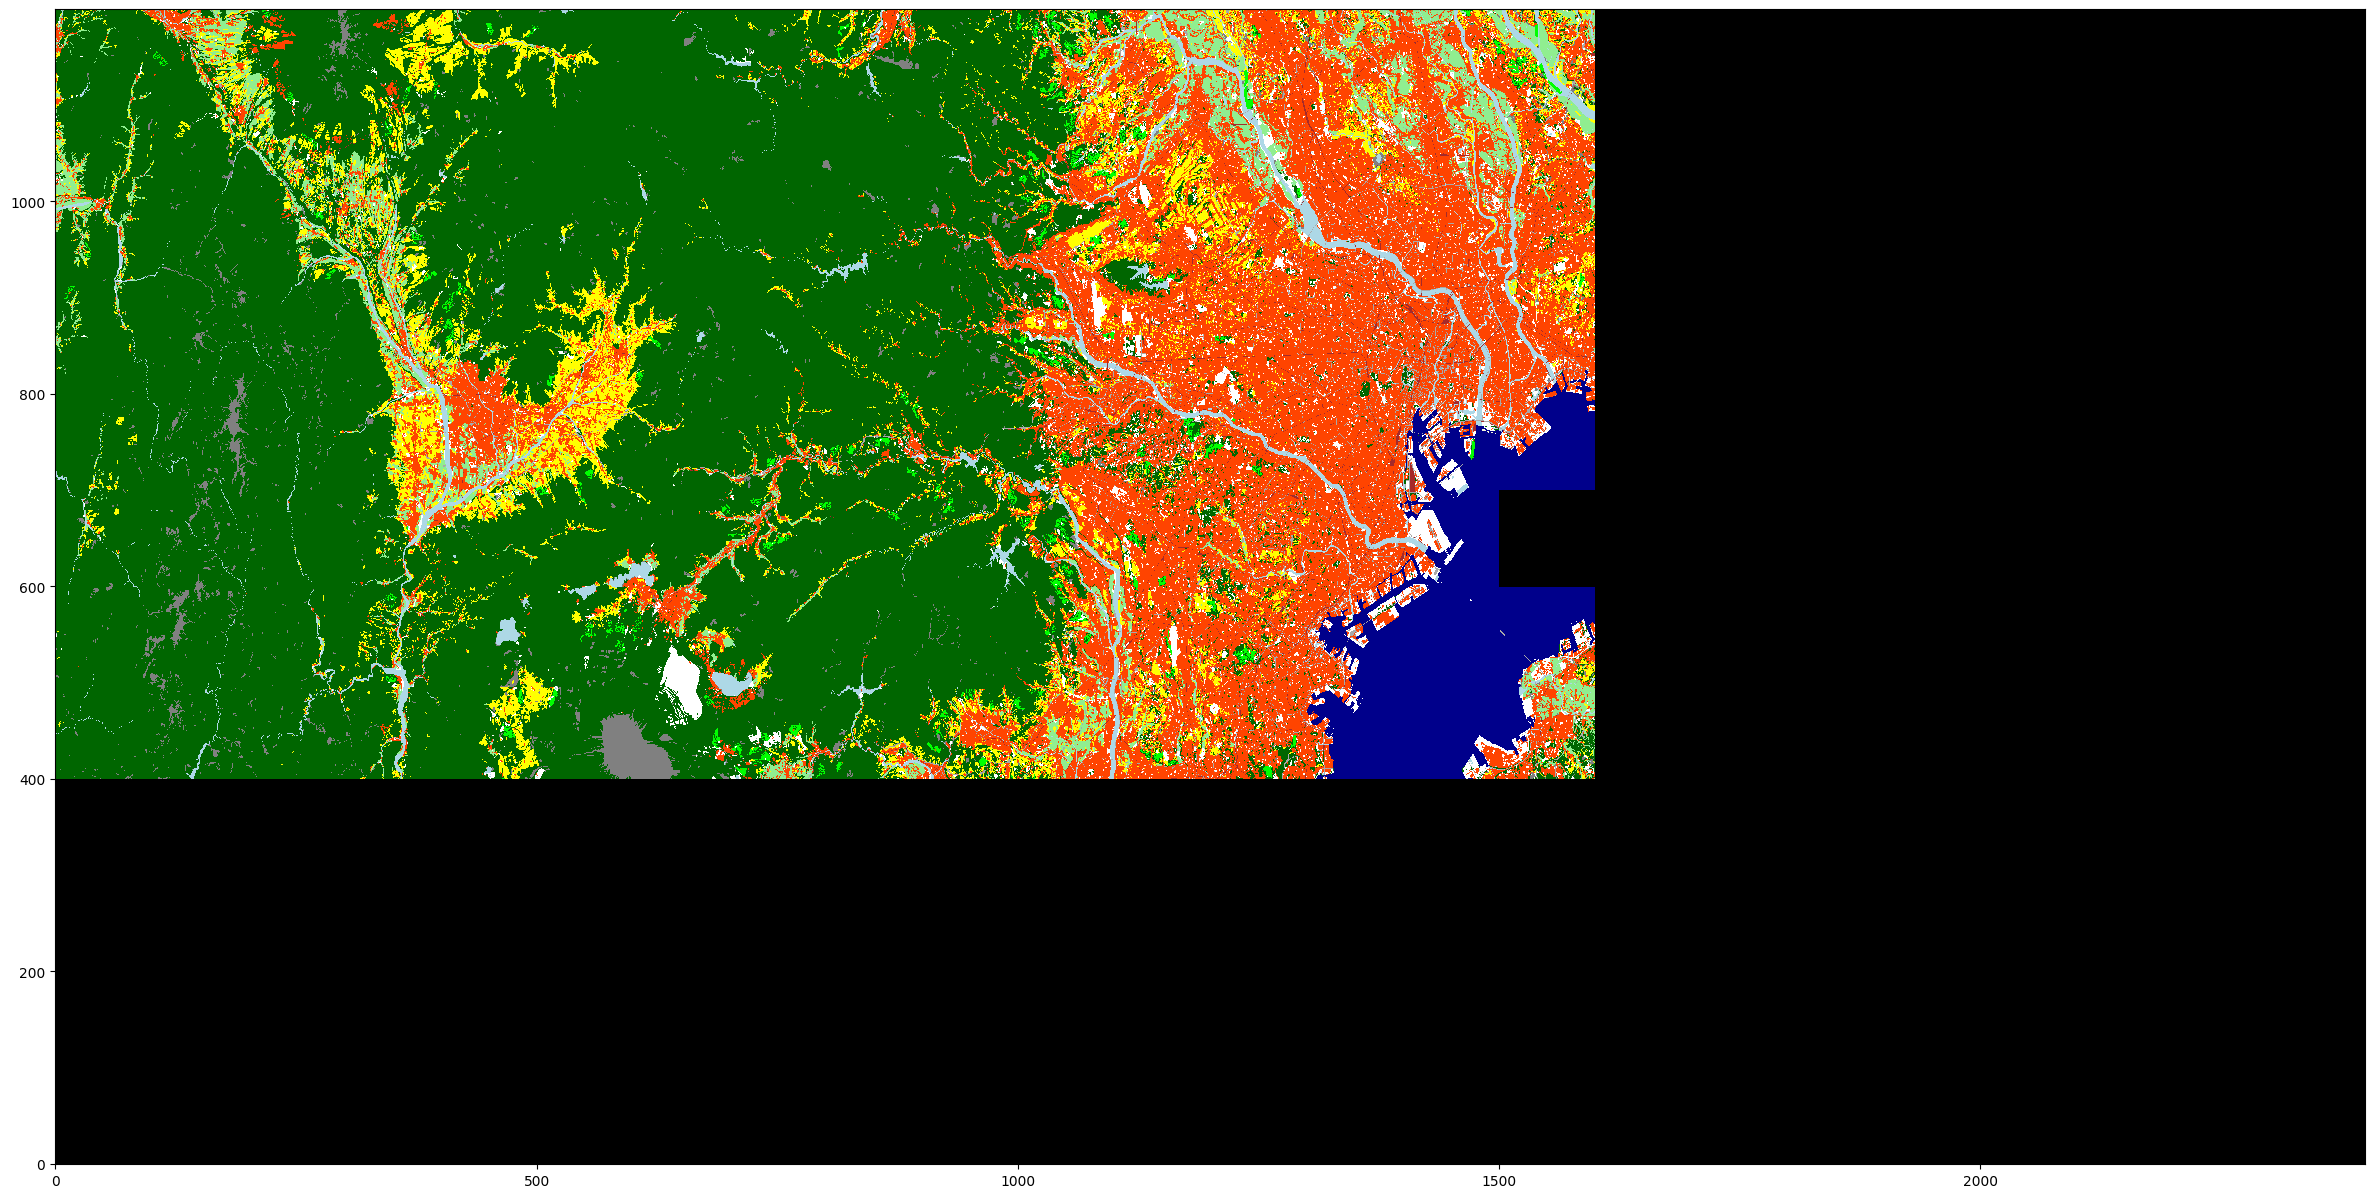

In [157]:
image = np.zeros([1200,2400,3], dtype=np.uint8)
image[:,:,0] = R
image[:,:,1] = G
image[:,:,2] = B

from matplotlib import pyplot as plt
fig, ax1 = plt.subplots(figsize=(30, 15))

plt.imshow(image, interpolation='nearest', origin="lower")
plt.show()

In [158]:
from IPython.display import HTML, display

def printmd(string):
    display(HTML(string))


md = ""
for row in range(650, 600, -1):
    for col in range(1000, 1050):
        char = map[row, col]
        r, g, b, a = colormapping[char]
        colorstr = f"#{int(r*255):02x}{int(g*255):02x}{int(b*255):02x}"
        md += f"<span style='color:{colorstr};'>{char}</span>"
    md += "<br />"

printmd(md)

リアルドラクエが作れそうだ。

branchで作った4ブロックの輪郭線を、ラスター画像に変換する。

In [113]:
import geopandas as gpd
from shapely.ops import cascaded_union

gdf = gpd.read_file("../branches/lime.geojson")
shape = cascaded_union(gdf["geometry"])
print(shape)

POLYGON ((138.88136111 35.57130556, 138.87877778 35.57319444, 138.87608333 35.57225, 138.875 35.57288889, 138.875 35.57286111, 138.87194444 35.57272222, 138.86836111 35.57086111, 138.86783333 35.57111111, 138.86633333 35.57080556, 138.86391667 35.57183333, 138.86266667 35.57294444, 138.85963889 35.57302778, 138.85875 35.57338889, 138.85597222 35.57605556, 138.85416667 35.57638889, 138.85216667 35.57605556, 138.8505 35.57683333, 138.84888889 35.57688889, 138.84569444 35.57855556, 138.84463889 35.57880556, 138.84052778 35.58038889, 138.83772222 35.57994444, 138.83266667 35.58066667, 138.83102778 35.57969444, 138.82813889 35.57986111, 138.82661111 35.57872222, 138.82138889 35.57780556, 138.81947222 35.57619444, 138.81672222 35.57547222, 138.816 35.57511111, 138.81391667 35.57191667, 138.81069444 35.5715, 138.80644444 35.571, 138.80305556 35.56997222, 138.80230556 35.569, 138.7995 35.56852778, 138.79805556 35.56697222, 138.79641667 35.56663889, 138.79527778 35.56794444, 138.79291667 35.568

/var/folders/g2/t_qwkbf48xj4860059bm17mh0000gs/T/ipykernel_28869/2146442806.py:5: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  shape = cascaded_union(gdf["geometry"])


In [116]:
import rasterio as rasio

# import geopandas as gpd
# from geocube.api.core import make_geocube

# burned = make_geocube(gdf, resolution=[1/800, 1/1200])

# extent = [138+0, 138+2400/800, 35+0, 35+1200/1200]
WSEN = (138, 35+1, 138 + 3, 35)
out_shape=[1200, 2400]
WSEN_trans = rasio.transform.from_bounds(*WSEN, *out_shape[::-1])
WSEN_trans

burned = rasio.features.rasterize(
    gdf["geometry"],
    out_shape=out_shape,
    transform=WSEN_trans,
    fill=np.nan,
    all_touched=True,
)


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

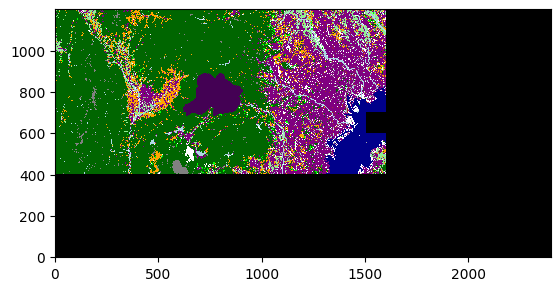

In [117]:
plt.imshow(image, interpolation='nearest', origin="lower")
plt.imshow(burned, interpolation='nearest', origin="lower")


In [121]:
map.shape, burned.shape

((1200, 2400), (1200, 2400))

In [129]:
np.unique(map[burned == 1], return_counts=True)


(array(['ゴ', '他', '建', '森', '水', '田', '畑', '荒', '道', '鉄'], dtype='<U1'),
 array([  273,   174,  1219, 35080,   271,   330,   893,   204,   182,
           67]))

できたので、全部まとめて処理する。

In [144]:
import geopandas as gpd
import rasterio as rasio
import pandas as pd

blocks = {"Y23": "red", "Y14": "orange", "Y56": "yellow", "Y7": "Lime"}


df = pd.DataFrame(columns=["block", "ゴ", "他", "建", "森", "水", "田", "畑", "荒", "道", "鉄"])
df = df.set_index("block")
for block, color in blocks.items():
    # ブロックの領域を読みこむ。
    gdf = gpd.read_file(f"../branches/{color}.geojson")

    # 範囲と解像度から、変換行列を準備する。
    WSEN = (138, 35 + 1, 138 + 3, 35)
    out_shape = [1200, 2400]
    WSEN_trans = rasio.transform.from_bounds(*WSEN, *out_shape[::-1])

    raster = rasio.features.rasterize(
        gdf["geometry"],
        out_shape=out_shape,
        transform=WSEN_trans,
        fill=np.nan,
        all_touched=True,
    )
    # v = {typ:num for typ, num in zip(*np.unique(map[raster == 1], return_counts=True))}
    # df = pd.concat([df, v])
    # print(df)
    for typ, num in zip(*np.unique(map[raster == 1], return_counts=True)):
        df.loc[block, typ] = num


df.loc["Y1234", :] = df.loc["Y14", :] + df.loc["Y23", :]
df.loc["Y123456", :] = df.loc["Y1234", :] + df.loc["Y56", :]
df.loc["Y1234567", :] = df.loc["Y123456", :] + df.loc["Y7", :]

df.loc[:, "山林"] = df.loc[:, "森"]
df.loc[:, "水田"] = df.loc[:, "田"]
df.loc[:, "畑地"] = df.loc[:, "畑"]
df.loc[:, "市街地"] = (
    df.loc[:, "建"] + df.loc[:, "道"] + df.loc[:, "鉄"] + df.loc[:, "ゴ"] + df.loc[:, "他"]
)
df.loc[:, "その他"] = df.loc[:, "荒"]


df

,ゴ,他,建,森,水,田,畑,荒,道,鉄,山林,水田,畑地,市街地,その他
block,,,,,,,,,,,,,,,
Y23,255,351,1517,16256,754,209,644,1039,66,20,16256,209,644,2209,1039
Y14,40,2105,1449,8440,662,563,477,482,36,3,8440,563,477,3633,482
Y56,257,89,1050,15370,115,671,457,130,53,47,15370,671,457,1496,130
Y7,273,174,1219,35080,271,330,893,204,182,67,35080,330,893,1915,204
Y1234,295,2456,2966,24696,1416,772,1121,1521,102,23,24696,772,1121,5842,1521
Y123456,552,2545,4016,40066,1531,1443,1578,1651,155,70,40066,1443,1578,7338,1651
Y1234567,825,2719,5235,75146,1802,1773,2471,1855,337,137,75146,1773,2471,9253,1855
